In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv


In [2]:
ms=pd.read_csv('../input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')

In [3]:
ms.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
ms['Date']=pd.to_datetime(ms['Date'])

In [6]:
ms['Date'][0]

Timestamp('2015-04-01 16:00:00')

In [7]:
tech_list = ms['Date'].unique()

Text(0.5, 1.0, 'Microsoft')

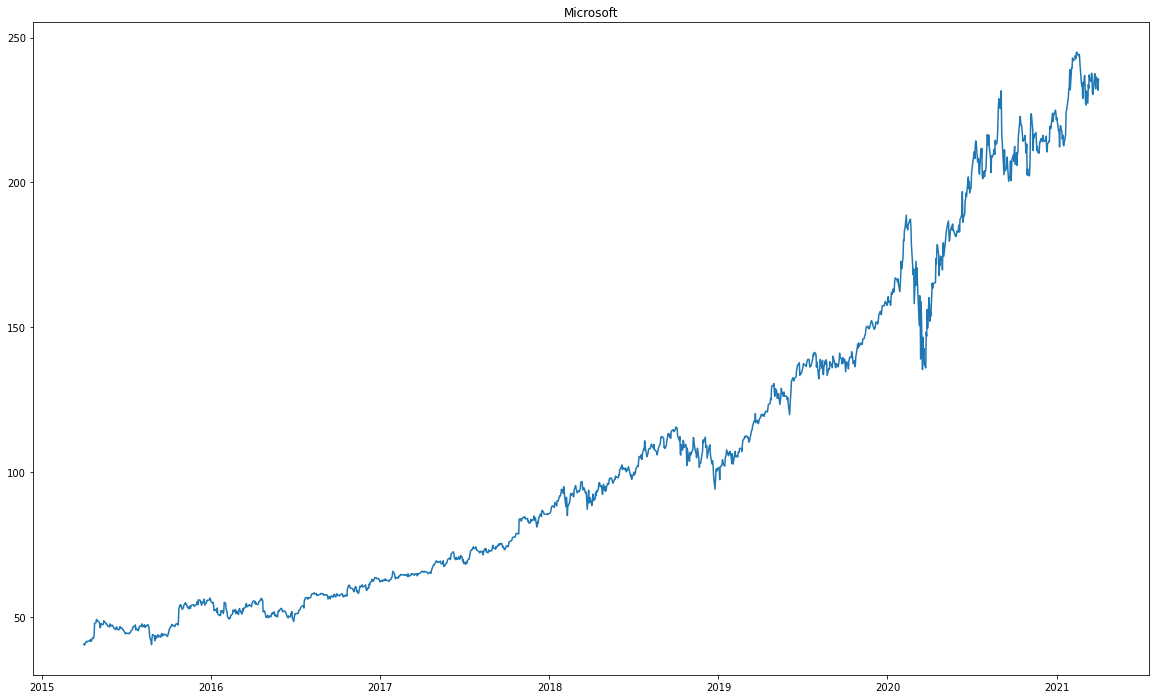

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(ms['Date'],ms['Close'])
plt.title('Microsoft')

Text(0.5, 1.0, 'Microsoft')

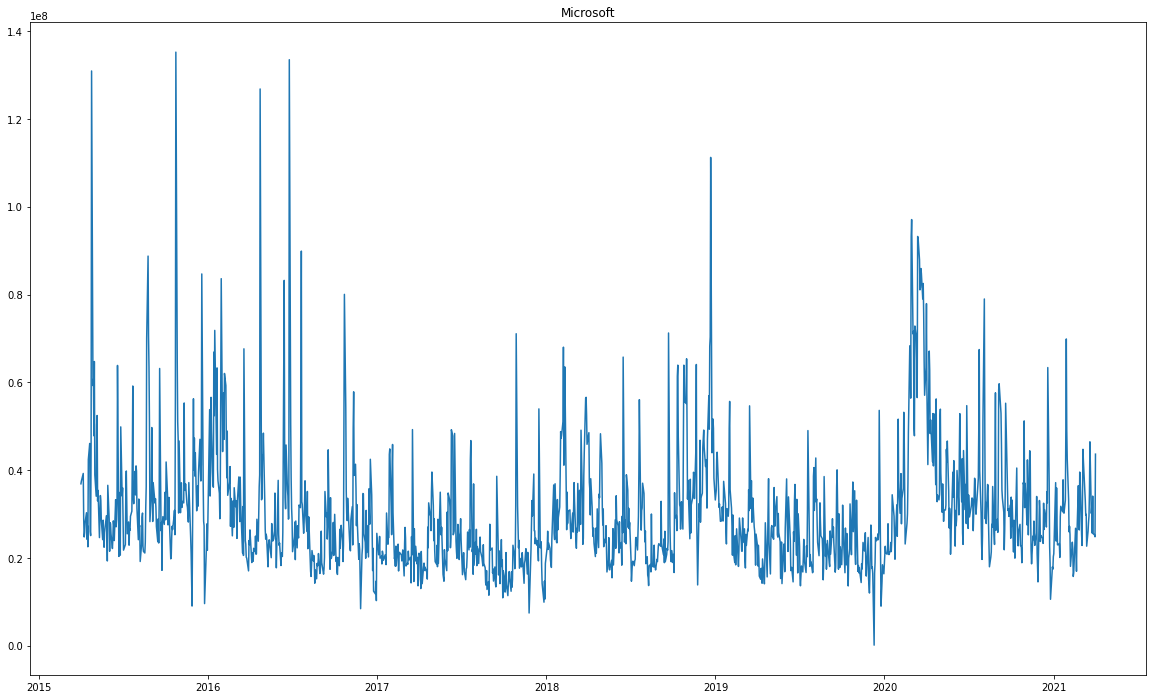

In [9]:
plt.figure(figsize=(20,12))
plt.plot(ms['Date'],ms['Volume'])
plt.title('Microsoft')

In [10]:
import plotly.express as px
fig = px.line(ms, x="Date", y="Volume", title='Volume Analysis')
fig.show()

In [11]:
ms["Date"].unique()

array(['2015-04-01T16:00:00.000000000', '2015-04-02T16:00:00.000000000',
       '2015-04-06T16:00:00.000000000', ...,
       '2021-03-29T16:00:00.000000000', '2021-03-30T16:00:00.000000000',
       '2021-03-31T16:00:00.000000000'], dtype='datetime64[ns]')

**Analysing Daily price change in stock**

To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company.

**Percentage return**

In [12]:
ms['1day % return']=((ms['Close']-ms['Open'])/ms['Close'])*100
ms.head()

,Date,Open,High,Low,Close,Volume,1day % return
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858


In [13]:
ms.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', '1day % return'], dtype='object')

**Data visulization**

In [14]:
fig = px.line(ms, x="Date", y="1day % return", title='Returns')
fig.show()

<AxesSubplot:>

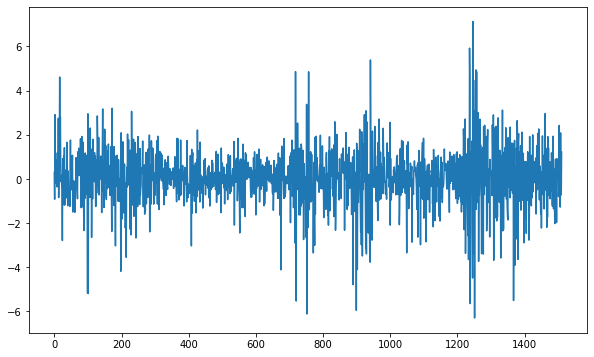

In [15]:
plt.figure(figsize=(10,6))
ms['1day % return'].plot()

Between some interval

In [16]:
print(ms['Date'])

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1511, dtype: datetime64[ns]


(array([18628., 18642., 18659., 18673., 18687., 18701., 18718.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

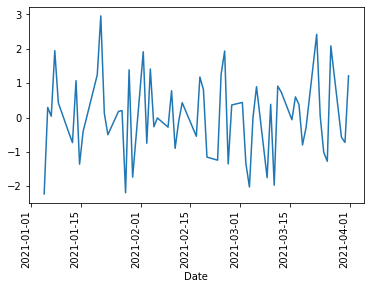

In [17]:
ms.set_index('Date')['2021-01-01':'2021-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

**Analysing monthly mean of close column**

In [18]:
ms2=ms.copy()

In [19]:
ms2['date']=pd.to_datetime(ms2['Date'])

In [20]:
ms2.set_index('Date',inplace=True)

In [21]:
ms2.head()

,Open,High,Low,Close,Volume,1day % return,date
Date,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695,2015-04-01 16:00:00
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342,2015-04-02 16:00:00
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154,2015-04-06 16:00:00
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632,2015-04-07 16:00:00
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858,2015-04-08 16:00:00


<AxesSubplot:xlabel='Date'>

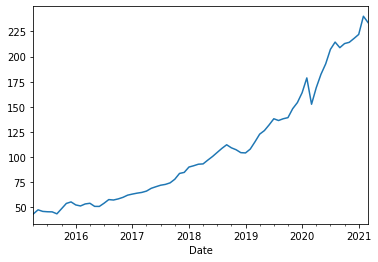

In [22]:
ms2['Close'].resample('M').mean().plot()

Resampling close column year wise

<AxesSubplot:xlabel='Date'>

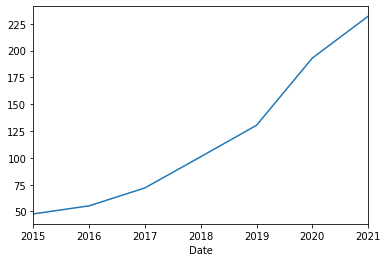

In [23]:
ms2['Close'].resample('Y').mean().plot()

In [24]:
ms2.describe()

,Open,High,Low,Close,Volume,1day % return
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07,0.036148
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07,1.288229
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05,-6.297779
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07,-0.572148
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07,0.069281
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07,0.741809
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08,7.133413


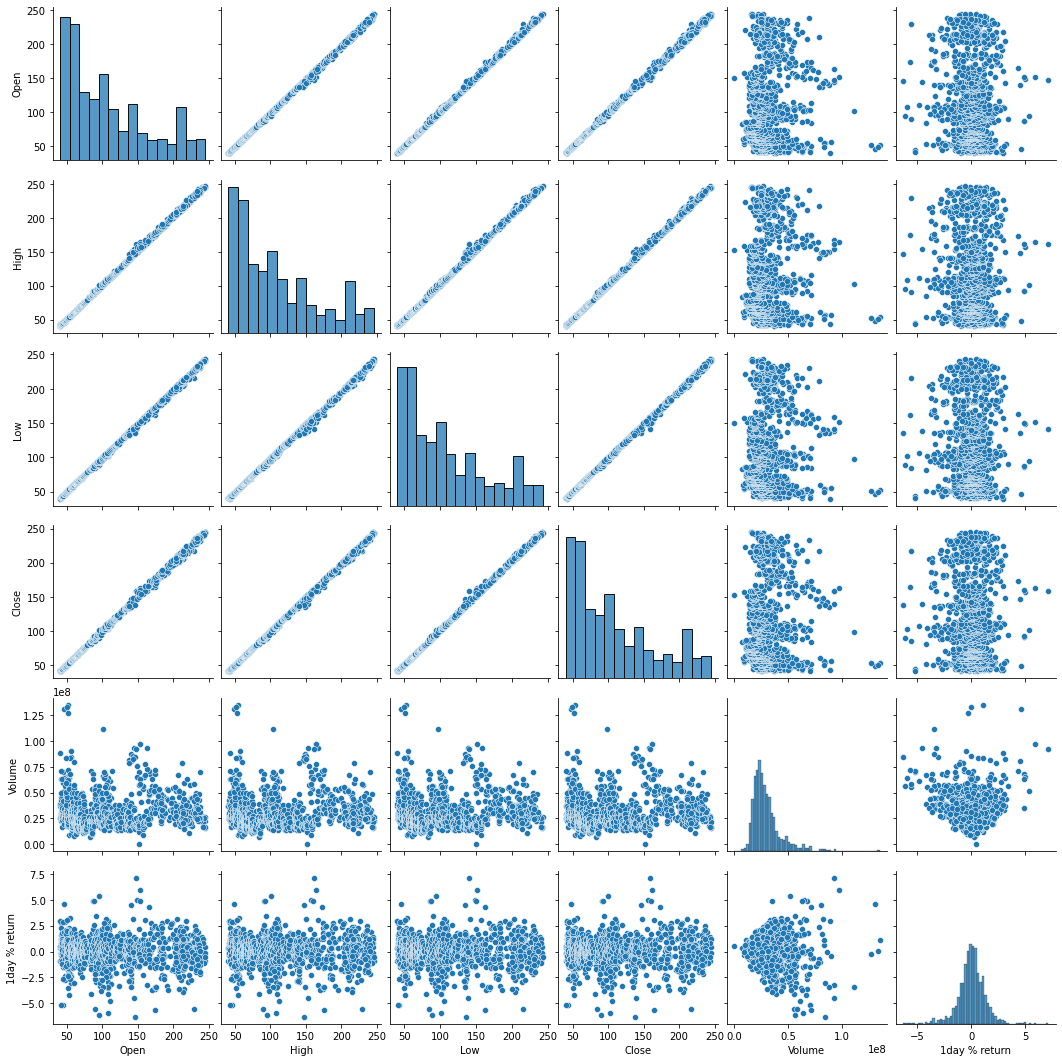

In [25]:
import seaborn as sns
sns.pairplot(data=ms2)

In [26]:
ms['ms_change']=((ms['Close']-ms['Open'])/ms['Close'])*100

In [27]:
ms.head()

,Date,Open,High,Low,Close,Volume,1day % return,ms_change
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695,0.294695
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342,-0.918342
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154,2.912154
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632,-0.192632
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858,-0.144858


**Value at risk analysis**

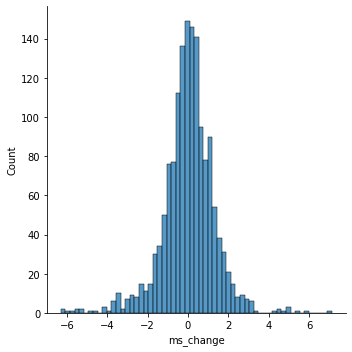

In [28]:
sns.displot(ms['ms_change'])

In [29]:
ms['ms_change'].std()

1.2882292460822853

In [30]:
ms['ms_change'].quantile(0.1)

-1.3494039041006172

1.3494039041006172 means that 90% of the times the worst daily Loss will not exceed 1.35

In [31]:
ms.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1511.0,1.073860e+02,5.669133e+01,40.340000,5.786000e+01,9.399000e+01,1.394400e+02,2.450300e+02
High,1511.0,1.084375e+02,5.738228e+01,40.740000,5.806000e+01,9.510000e+01,1.403250e+02,2.461300e+02
Low,1511.0,1.062945e+02,5.597716e+01,39.720000,5.742000e+01,9.292000e+01,1.378250e+02,2.429200e+02
Close,1511.0,1.074221e+02,5.670230e+01,40.290000,5.785500e+01,9.386000e+01,1.389650e+02,2.449900e+02
Volume,1511.0,3.019863e+07,1.425266e+07,101612.000000,2.136213e+07,2.662962e+07,3.431962e+07,1.352271e+08
1day % return,1511.0,3.614810e-02,1.288229e+00,-6.297779,-5.721477e-01,6.928086e-02,7.418092e-01,7.133413e+00
ms_change,1511.0,3.614810e-02,1.288229e+00,-6.297779,-5.721477e-01,6.928086e-02,7.418092e-01,7.133413e+00
